## Sample 4.8 Emcee demo

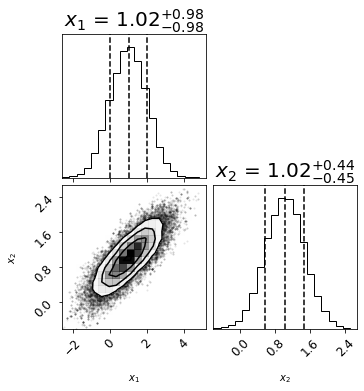

In [1]:
#redo this with emcee package
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
import emcee
import corner
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

def lnprob(x, mu, cov):
    return np.log(stats.multivariate_normal.pdf(x,mu,cov))

ndim = 2

mu = np.array([1.,1.])
s1 = 1.
s2 = 0.2
rho = 0.8
cov = np.array([[s1, rho*np.sqrt(s1*s2)],\
        [rho*np.sqrt(s1*s2),s2]])
#generate random numbers from 2D normal distribution
xx = np.random.multivariate_normal(mu,cov,100000) 
xgrid = np.arange(-2.,4.,0.2)
ygrid = np.arange(-2.,4.,0.2)
xcenter = (xgrid[0:-1]+xgrid[1:])/2.
ycenter = (ygrid[0:-1]+ygrid[1:])/2.
#make 2d histogram
hxx,xedge,yedge = np.histogram2d(\
                xx[:,0],xx[:,1],bins=[xgrid,ygrid])

#start to configure emcee
nwalkers = 50

p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))
sampler = emcee.EnsembleSampler(nwalkers, \
        ndim, lnprob, args=[mu, cov])

pos, prob, state = sampler.run_mcmc(p0, 100)
sampler.reset()

sampler.run_mcmc(pos, 1000)

samples = sampler.chain[:, :, :].reshape((-1, ndim))

fig = corner.corner(samples,labels=[r"$x_1$", r"$x_2$"],\
                       quantiles=[0.16, 0.5, 0.84],\
                       show_titles=True,\
                       title_kwargs={"fontsize": 20})
fig.savefig('emcee_sample.png',bbox_inches='tight')